In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
sess = tf.Session()

Instructions for updating:
non-resource variables are not supported in the long term


## Data Extraction and Processing

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
mnist = fetch_openml('mnist_784')
required_target = mnist.target.reshape(len(mnist.target), 1)
a = OneHotEncoder()
a.fit(required_target)
inputData = mnist.data 
target = a.transform(required_target).toarray()

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputData, target)

## Plotting the images 

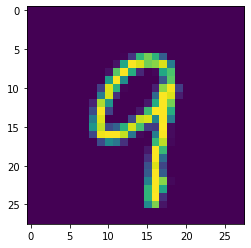

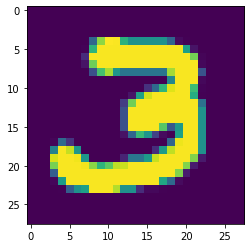

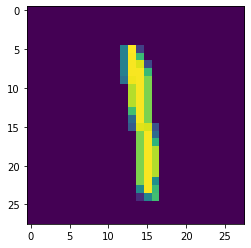

In [4]:
import matplotlib.pyplot as plt
img1 = x_train[10].reshape((28, 28))
img2 = x_train[5].reshape((28, 28))
img3 = x_train[489].reshape((28, 28))
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()

# Applying neural network

In [5]:
# Weights and biases
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

Weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
    'output': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
}

Biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden1])),
    'h2': tf.Variable(tf.random_normal([n_hidden2])),
    'output': tf.Variable(tf.random_normal([n_classes]))
}

## Forward Propagation

In [6]:
def forward_propagation(Weights, Biases, x):
    layer1_input = tf.add(Biases['h1'], tf.matmul(x, Weights['h1']))
    layer1_output = tf.nn.relu(layer1_input)
    
    layer2_input = tf.add(Biases['h2'], tf.matmul(layer1_output, Weights['h2']))
    layer2_output = tf.nn.relu(layer2_input)
    
    output = tf.add(Biases['output'], tf.matmul(layer2_output, Weights['output']))
    
    return output

## Prediction and Accuracy

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
sess = tf.Session()
sess.run(tf.global_variables_initializer())

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])

### Without Optimization

In [8]:
pred = forward_propagation(Weights, Biases, x)
Predictions = tf.argmax(pred, axis = 1)
correct_labels = tf.argmax(y, axis = 1)
y_pred, true_labels = sess.run([Predictions, correct_labels], 
                                             feed_dict = {x: x_test, y: y_test})

correct_predictions = tf.equal(y_pred, true_labels)
correct_pred = sess.run(correct_predictions, feed_dict = {x: x_test, y: y_test})
print("Correctly predicted classes :", correct_pred.sum(), " among ", x_test.shape[0])

print("Accuracy : ", accuracy_score(y_pred, true_labels) * 100)
print("\n\n\n Classification Report : \n\n\n", classification_report(y_pred, true_labels))

Correctly predicted classes : 1793  among  17500
Accuracy :  10.245714285714286



 Classification Report : 


               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.00      0.02      0.00       185
           2       0.12      0.18      0.14      1190
           3       0.03      0.05      0.04      1273
           4       0.79      0.11      0.19     12062
           5       0.00      0.00      0.00         1
           6       0.03      0.04      0.04      1204
           7       0.00      0.00      0.00        14
           8       0.07      0.08      0.07      1374
           9       0.01      0.08      0.01       158

    accuracy                           0.10     17500
   macro avg       0.10      0.06      0.05     17500
weighted avg       0.56      0.10      0.16     17500



### With Optimization

In [9]:
# cost function used here is cross entropy cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate = 0.05)
optimize = optimizer.minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
batch_size = 500
c = 0
sess.run(tf.global_variables_initializer())
for i in range(30):
    for s in range(0, x_train.shape[0], batch_size):
        batch_x = x_train[s : (s + batch_size)]
        batch_y = y_train[s : (s + batch_size)]
        c, _ = sess.run([cost, optimize], feed_dict = {x: batch_x, y: batch_y})
    print(c, end = " , ")

1983.302 , 1061.522 , 941.9491 , 579.30927 , 448.36554 , 312.10928 , 261.07663 , 255.76187 , 172.3729 , 271.11047 , 153.25308 , 157.74045 , 201.81241 , 105.06037 , 34.291367 , 150.36566 , 99.17921 , 125.984955 , 110.029686 , 76.303795 , 39.204742 , 57.503307 , 64.42915 , 139.69164 , 102.111725 , 37.236305 , 68.7911 , 45.994297 , 96.01844 , 24.901222 , 

In [11]:
Predictions = tf.argmax(pred, axis = 1)
correct_labels = tf.argmax(y, axis = 1)
correct_predictions = tf.equal(y_pred, true_labels)
y_pred, true_labels, correct_pred = sess.run([Predictions, correct_labels, correct_predictions], 
                                             feed_dict = {x: x_test, y: y_test})
print("Correctly predicted classes :", correct_pred.sum(), " among ", x_test.shape[0])

print("Accuracy : ", accuracy_score(y_pred, true_labels) * 100)
print("\n\n\n Classification Report : \n\n\n", classification_report(y_pred, true_labels))

Correctly predicted classes : 1793  among  17500
Accuracy :  95.72571428571428



 Classification Report : 


               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1768
           1       0.99      0.98      0.98      1897
           2       0.94      0.97      0.96      1763
           3       0.95      0.95      0.95      1777
           4       0.95      0.95      0.95      1695
           5       0.94      0.97      0.95      1545
           6       0.97      0.96      0.97      1831
           7       0.96      0.97      0.96      1820
           8       0.94      0.94      0.94      1660
           9       0.95      0.93      0.94      1744

    accuracy                           0.96     17500
   macro avg       0.96      0.96      0.96     17500
weighted avg       0.96      0.96      0.96     17500



In [13]:
# Optimized Accuracy - 95.725%